In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
true = 10
pred = np.linspace(1,21,21)

"""
The sample size(n) is assumed to be 1.
"""

'\nThe sample size(n) is assumed to be 1\n'

In [3]:
def plot_graph(metric,prediction,loss_fuction):
    plt.plot(prediction,metric)
    plt.title('compute_depth_errors')
    plt.xlabel('Pred')
    plt.ylabel('%s'%loss_fuction)
    plt.grid(True)
    plt.show

**MAE**
===

_Mean Absolute Error(MAE), also known as L1 loss, is one of the simplest loss functions used for evalutting the performace of a model._
> **Pros of the MAE Evaluation Metric:**
* It is easy to compute.
* All errors are treated equally, regardless of their magnitude.
* It is considered more robust than MSE due to its linear nature and reduced sensitivity to outliers.
* It provides an even measure of how well the model is performing.

> **Cons of the MAE Evaluation Metric:**
* It treats errors as positive values regardless of their direction
* It is scale-dependent, making it difficult to compare the performance
* One of the main disadvantages of MAE is that it is not differentiable at zero

**KEY WORD:** Non-negative, Linear, Robust, Non-differentiable, Convex, Scale-dependent

### **Meaning of Absolute Relative Error in Evaluating Depth Estimation**
* It allows assesment of the overall recognition performance across all areas in depth estimation.

In [4]:
def mean_absolute_error(true, pred):
    mae_loss = np.abs(true - pred) / 2
    return mae_loss

**MSE**
===

_Mean squared error(MSE), also known as L2 loss, is characterized by its quadratic nature as th e penalty is not proportional to the error but to the square of the error._
> **Pros of the MSE Evaluation Metric:**
* It is a conves function, ensuring a unitque global minimum.
* It penalizes the model for large errors by squraing them.
* it effectively addresses outlirers by assigning them greater weight.
* It is particularly effective in handling small errors.
> **Cons of the MSE Evaluation Metric:**
* It is not ronust to outlers due to the quadratic nature of the error term.
* It is scale-dependent, making it less suitable for comparing different measures.
* The presence of new outliers in the dataset can distort the resulting values.

**KEY WORD:** Non-negative, Linear, Robust, Non-differentiable, Convex, Scale-dependent

### **Meaning of Square Relative Error in Evaluating Depth Estimation**
* It faciliates the evaluation of performance in areas where depth errors can significantly increase, such as distant regions or image boundaries.

In [5]:
def mean_squared_error(true, pred): 
    mse_loss = np.square(true - pred)/1
    return mse_loss

**RMSE**
===

_Root Mean Squared Error(RMSE), also known as Root Mean Square Deviation, measures the avaerage magnitude of the errors and is concerned with the deviations from the actual value._
> **Pros of the MSE Evaluation Metric:**
* It does not penalize the errors as much as MSE does due to the square root.
* It is easy to interpret as it shares the same units as the original data.

> **Cons of the MSE Evaluation Metric:**
* Like MSE, RMSE is scale-dependent, meaning its value increases with the scale of errors.
* Outliers can siginificantly impact the resulting values.

### **Meaning of Root Mean Squared Error in Evaluating Depth Estimation**
* RMSE, similar to Square Relative Error, employs squared errors, rendering it sensitive to outliers and thus appropriate for assessing performance in distant regions or image boundaries

In [6]:
def root_mean_squared_error(true, pred):
    rmse_loss = np.sqrt(np.square(true - pred))/1
    return rmse_loss

**Log Scale RMSE**
===

_It involves applying the logarithm to the actual values before calculating RMSE, ensuring sensitivity to a wider range of values. This method enhances robustness to outliers and allows for relative comparisons within the logg value range, resulting in comparatively smaller fluctuations_

### **Meaning of Log Scale Root Mean Squared Error in Evaluating Depth Estimation**
* Log scale RMSE adjusts large values relatively smaller and small values relatively larger by applying logarithm, providing comparable weights for large and small errors. This allows for an overall assessment of performance in depth estimation.

In [7]:
def log_scale_rmse(true, pred):
    log_scale_rmse = np.sqrt(np.square(np.log(true) - np.log(pred)))/1
    return log_scale_rmse

**Accuracy under threshold**
(a1,a2,a3)
===
_The accuracy in depth estimation ensures precision by comparing predicted depth values with ground truth values such as LiDAR point clouds. This guarantees a result greater than 1 by placing the larger value of predicted depth or actual depth in the numerator and the smaller value in the denominator._

>For thresholds denoted as a1, a2, and a3:

* a1 corresponds to δ=1.25,
    * a2 corresponds to δ2=1.25^2=1.5625,
    * a3 corresponds to δ3=1.25^3=1.953125.

#### These thresholds determine whether the ratio between predicted and actual depths is below the threshold value (δ), indicating a True Positive prediction.



In [8]:
def accuracy_under_threshold(true,pred):
    delta = np.maximum((true / pred),(pred / true))
    a1 = (delta < 1.25     )
    a2 = (delta < 1.25 ** 2)
    a3 = (delta < 1.25 ** 3)
    return a1,a2,a3

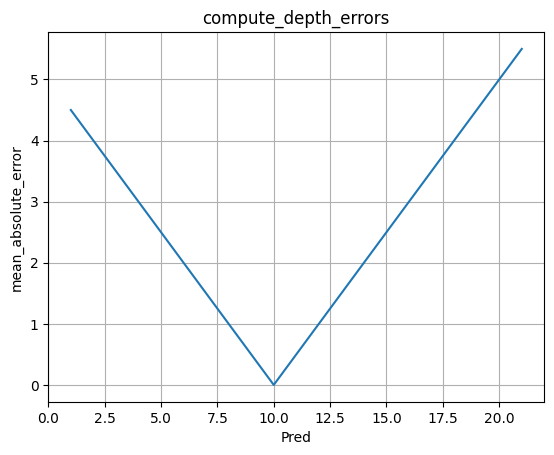

In [9]:
plot_graph(mean_absolute_error(true,pred),pred,'mean_absolute_error')

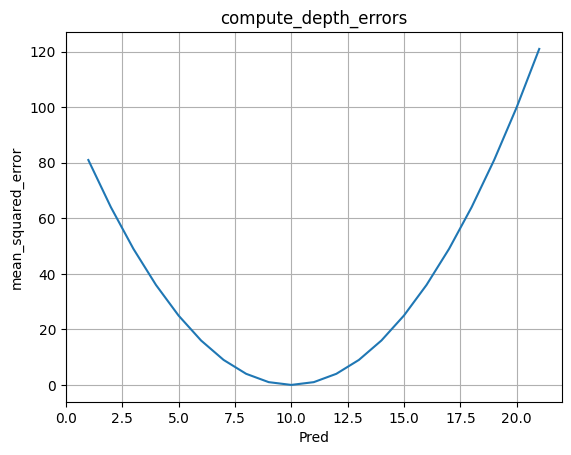

In [10]:
plot_graph(mean_squared_error(true,pred),pred,'mean_squared_error')

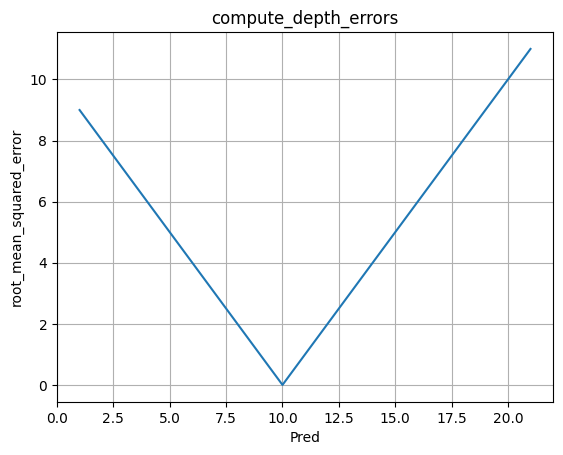

In [11]:
plot_graph(root_mean_squared_error(true,pred),pred,'root_mean_squared_error')

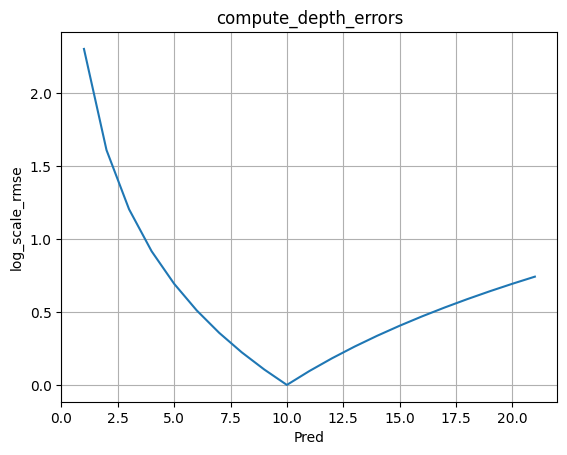

In [12]:
plot_graph(log_scale_rmse(true,pred),pred,'log_scale_rmse')

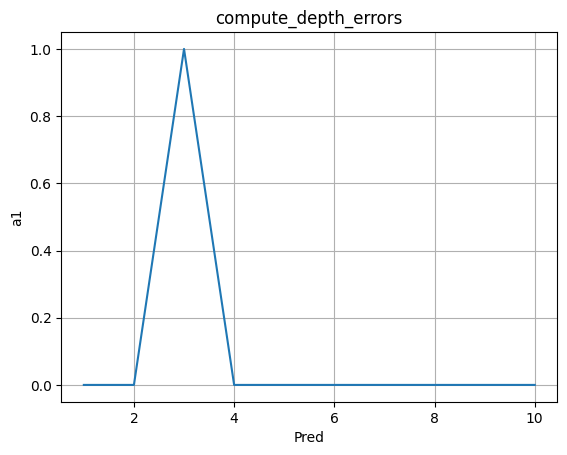

In [13]:
true = 3
pred = np.linspace(1,10,10)
a1,a2,a3 = accuracy_under_threshold(true,pred)
plot_graph(a1,pred,'a1')


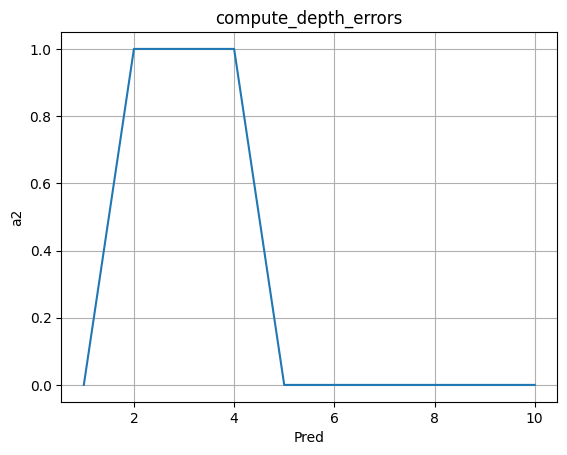

In [14]:
plot_graph(a2,pred,'a2')

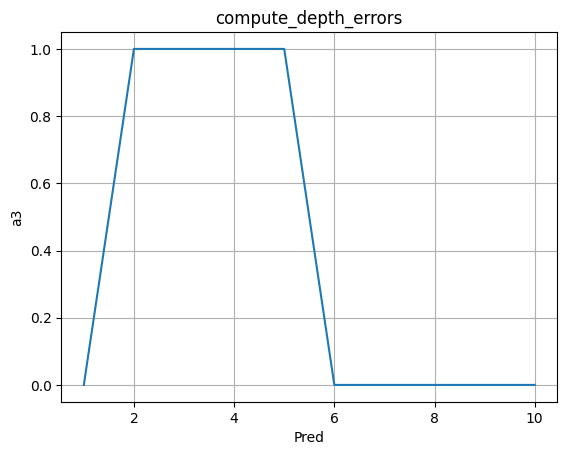

In [15]:
plot_graph(a3,pred,'a3')